# Assignment 7 - Numpy and Matplotlib
### Due Thursday, June 3, 2021

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` with the filename `Assignment_7.ipynb`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [368]:
import numpy as np


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

(you can have bash command inside a Jupyter cell if they start with a `!` )

In [370]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz --no-check-certificate

#### 1.3 Load the data file

In [392]:
data = np.load('argo_float_4901412.npz')

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [393]:
T=data['T']
S=data['S']
P=data['P']

x=len(T)
y=len(T[0])

##Loop below replaces nans in the dataset with 0
nan_num=0
for i in range(x):
    for j in range(y):
        T_temp=np.isnan(T[i][j])
        S_temp=np.isnan(S[i][j])
        P_temp=np.isnan(P[i][j])
        if T_temp==True or S_temp==True or P_temp==True:
            T[i][j]=0
            S[i][j]=0
            P[i][j]=0
            nan_num=nan_num+1
#print(T)
         

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [394]:
date=data['date']
lat=data['lat']
lon=data['lon']
levels=data['levels']


#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [395]:
print('T shape: ',T.shape)
print('S shape: ',S.shape)
print('P shape: ',P.shape)

print('date shape: ',date.shape)
print('lat shape: ',lat.shape)
print('lon shape: ',lon.shape)
print('levels shape: ',levels.shape)
####
print('T,S,P are NDarrays while lat,date,lon, and levels are all 1D arrays')

T shape:  (78, 75)
S shape:  (78, 75)
P shape:  (78, 75)
date shape:  (75,)
lat shape:  (75,)
lon shape:  (75,)
levels shape:  (78,)
T,S,P are NDarrays while lat,date,lon, and levels are all 1D arrays


#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [396]:
import matplotlib.pyplot as plt

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

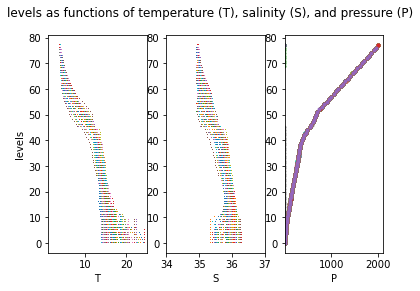

In [397]:
fig, index = plt.subplots(1,3)
fig.suptitle('levels as functions of temperature (T), salinity (S), and pressure (P)')
index[0].plot(T,levels,marker=',',linestyle=' ')
index[0].set(xlabel='T',ylabel='levels')
index[0].set_xlim([1, 25])

index[1].plot(S,levels,marker=',',linestyle=' ')
index[1].set(xlabel='S')
index[1].set_xlim([34, 37])
index[2].plot(P,levels,marker='.',linestyle=' ')
index[2].set(xlabel='P') 
index[2].set_xlim([5, 2100])
plt.show()

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [398]:
meanT=np.zeros(len(levels))
meanS=np.zeros(len(levels))
meanP=np.zeros(len(levels))
sd_T=np.zeros(len(levels))
sd_S=np.zeros(len(levels))
sd_P=np.zeros(len(levels))

for i in range(len(levels)):
    meanT[i]=np.mean(T[i][T[i]!=0])
    meanS[i]=np.mean(S[i][S[i]!=0])
    meanP[i]=np.mean(P[i][P[i]!=0])
    sd_T[i]=np.std(T[i][T[i]!=0])
    sd_S[i]=np.std(S[i][S[i]!=0])
    sd_P[i]=np.std(P[i][P[i]!=0])    

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

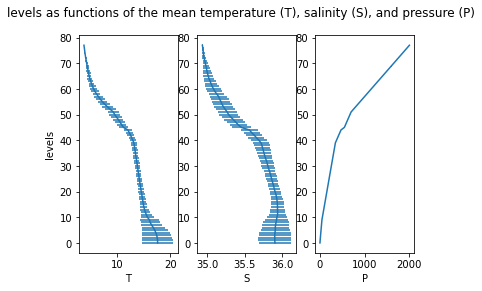

In [399]:
## Note can't see error of levels(P) due to scale

fig, axes = plt.subplots(1,3)
fig.suptitle('levels as functions of the mean temperature (T), salinity (S), and pressure (P)')

axes[0].errorbar(meanT,levels, xerr=sd_T)
axes[0].set(xlabel='T')
axes[0].set(ylabel='levels')
axes[1].errorbar(meanS,levels, xerr=sd_S)
axes[1].set(xlabel='S')
axes[2].errorbar(meanP,levels, xerr=sd_P)
axes[2].set(xlabel='P')

plt.show()


#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [400]:
T_time=np.zeros(len(T[0]))
S_time=np.zeros(len(T[0]))
P_time=np.zeros(len(T[0]))

T_std=np.zeros(len(T[0]))
S_std=np.zeros(len(T[0]))
P_std=np.zeros(len(T[0]))

tempT=0
tempS=0
tempP=0
lenT=0
lenS=0
lenP=0


templistT=[]
templistP=[]
templistS=[]


for i in range(len(T[0])):
    for time in range(len(T)):
        ## Using if statements to remove the nan values (relabelled as 0 above) from the raw data
        if T[time][i]>0:
            tempT+=T[time][i]
            lenT+=1
            templistT.append(T[time][i])
        if S[time][i]>0:
            tempS+=S[time][i]
            lenS+=1
            templistS.append(S[time][i])
        if P[time][i]>0:
            tempP+=P[time][i]
            lenP+=1
            templistP.append(P[time][i])
            
    #### saving the data based on date    
    T_std[i]=np.std(templistT)
    S_std[i]=np.std(templistS)
    P_std[i]=np.std(templistP)
    T_time[i]=tempT/lenT
    S_time[i]=tempS/lenS
    P_time[i]=tempP/lenP
    
    #### clearing dummy variables to iterate again
    templistT=[]
    templistS=[]
    templistP=[]
    tempT=0
    tempS=0
    tempP=0
    lenT=0
    lenS=0
    lenP=0

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

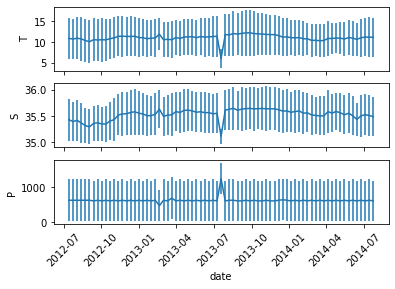

In [401]:
fig, axes = plt.subplots(3,1)
axes[0].errorbar(date,T_time,yerr=T_std)
axes[0].set(ylabel='T')
axes[1].errorbar(date,S_time,yerr=S_std)
axes[1].set(ylabel='S')
axes[2].errorbar(date,P_time,yerr=P_std)
axes[2].set(ylabel='P')
axes[2].set(xlabel='date')
axes[2].xaxis.set_tick_params(rotation=45)
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])


plt.show()

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

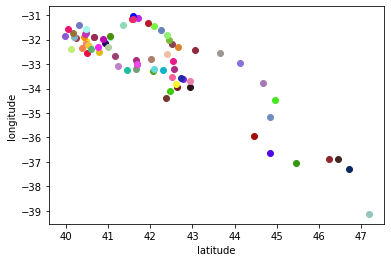

In [402]:
import random

fig=plt.figure()
axes=fig.add_subplot()
for i in range(len(lat)):
    # using rgb values to have each date as a different color
    # Chances of reproducing the same color is exponentially low so do not need to track which colors are used already
    # No legend since there are so many data points
    rgb = (random.random(),random.random(),random.random())
    axes.scatter(lat[i], lon[i],c=[rgb] )
    axes.set(ylabel='longitude', xlabel='latitude')
    
plt.show()

    

# 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

In [403]:
def myMatrixMultiply(A,B,n):
    C=np.zeros((n,n))
    for i in range(len(A)):
        for j in range(len(A[0])):
            for k in range(len(A)):
                C[i][j]=C[i][j]+(A[i][k]*B[k,j])
    return C


#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [390]:
import timeit
%timeit -n1 myMatrixMultiply(np.ones((100,100)),np.ones((100,100)),100)

1.3 s ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

In [58]:
A=np.ones((100,100))
B=np.ones((100,100))
%timeit -n1 np.dot(A,B)

#### Using np.dot() is ~6000x faster than systematically iterating through each index

The slowest run took 4.18 times longer than the fastest. This could mean that an intermediate result is being cached.
154 µs ± 79.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now time how long the NumPy `dot()` version takes for n = 1000

In [59]:
A=np.ones((1000,1000))
B=np.ones((1000,1000))
%timeit -n1 np.dot(A,B)

##Using 1000x1000 for np.dot() is still ~40x faster than using 100x100 than the myMatrixMultiply function.

30.2 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And, finally, measure NumPy's `dot()` for n = 10000 (be patient, and defintely don't try this with `myMatrixMultiply` !)

In [61]:
A=np.ones((10000,10000))
B=np.ones((10000,10000))
%timeit -n1 np.dot(A,B)

18.8 s ± 674 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Your results should demonstrate to you that the run time for matrix-matrix multiplication scales as a power law of `n`.

Assuming that the run time of `myMatrixMultiply` is proportional to the cube of `n`, approximately how long would you expect the run time to be for n=10000 in the original Python version?


In [391]:
## It would take ~(10000)^3=1e12 seconds (~32000 years)

NumPy allows you to do computations that would be way to slow with only Python statements.